In [2]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [23]:
folder = "experiment13test/"

# HUG
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_JOINT_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
RMSE_HUG      = load(folder + "RMSE_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG    = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG    = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG     = load(folder + "A_HOP_HUG.npy")
N_UNIQUE_HUG  = load(folder + "N_UNIQUE_HUG.npy")
THETA_AC_HUG  = load(folder + "THETA_AC_HUG.npy")
U_AC_HUG      = load(folder + "U_AC_HUG.npy")

# THUG
THETA_ESS_THUG = load(folder + "THETA_ESS_THUG.npy")
U_ESS_THUG     = load(folder + "U_ESS_THUG.npy")
ESS_THUG       = load(folder + "ESS_JOINT_THUG.npy")
A_THUG         = load(folder + "A_THUG.npy")
RMSE_THUG      = load(folder + "RMSE_THUG.npy")
EJSD_THUG      = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG    = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG    = load(folder + "T_EJSD_THUG.npy")
A_HOP_THUG     = load(folder + "A_HOP_THUG.npy")
N_UNIQUE_THUG  = load(folder + "N_UNIQUE_THUG.npy")
THETA_AC_THUG  = load(folder + "THETA_AC_THUG.npy")
U_AC_THUG      = load(folder + "U_AC_THUG.npy")

# COMMON
EPSILONS       = load(folder + "EPSILONS.npy")
ALPHAS         = load(folder + "ALPHAS.npy")

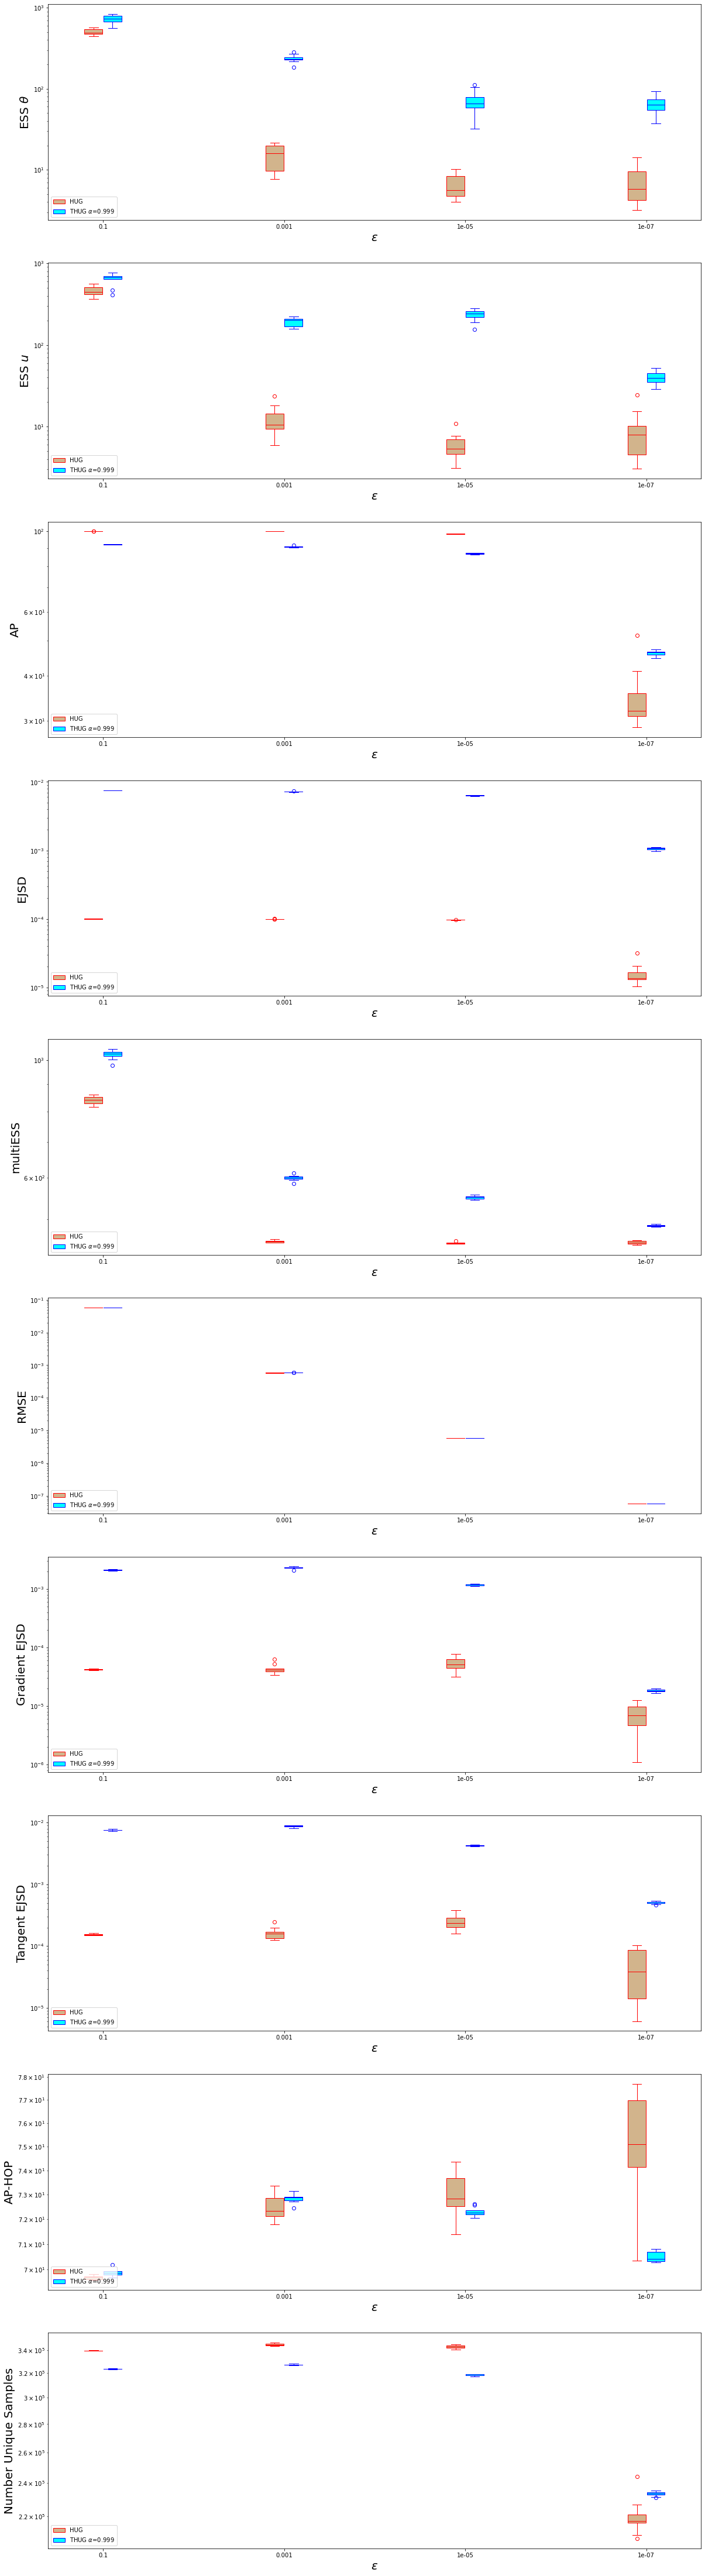

In [24]:
columns = EPSILONS
width = 0.21
thing_that_changes = ALPHAS
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']
labels = ['HUG'] + ['THUG $\\alpha$={}'.format(thing) for thing in thing_that_changes]

ARRAYS = [
    (THETA_ESS_HUG, THETA_ESS_THUG),
    (U_ESS_HUG, U_ESS_THUG),
    (A_HUG, A_THUG),
    (EJSD_HUG, EJSD_THUG),
    (ESS_HUG, ESS_THUG),
    (RMSE_HUG, RMSE_THUG),
    (G_EJSD_HUG, G_EJSD_THUG),
    (T_EJSD_HUG, T_EJSD_THUG),
    (A_HOP_HUG, A_HOP_THUG),
    (N_UNIQUE_HUG, N_UNIQUE_THUG)
]
YLABELS = [
    'ESS $\\theta$', 
    'ESS $u$',
    'AP',
    'EJSD',
    'multiESS',
    'RMSE',
    'Gradient EJSD',
    'Tangent EJSD',
    'AP-HOP',
    'Number Unique Samples'
]
n_plots = len(ARRAYS)
fig, ax = plt.subplots(nrows=n_plots, figsize=(20, 8 * n_plots))
for ix, (array1, array2) in enumerate(ARRAYS):
    bp1 = box_plot(ax[ix], array1.T.tolist(), 'red', 'tan', positions[0])
    bps = []
    for i in range(n_alphas):
        bps.append(box_plot(ax[ix], array2[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
    handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
    ax[ix].legend(
        handles, 
        labels, 
        loc='lower left')
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(columns)
    ax[ix].set_xlabel("$\\epsilon$", fontsize=20)
    ax[ix].set_ylabel(YLABELS[ix], fontsize=20)
    ax[ix].semilogy()

plt.show()

# Two Autocorrelations Only

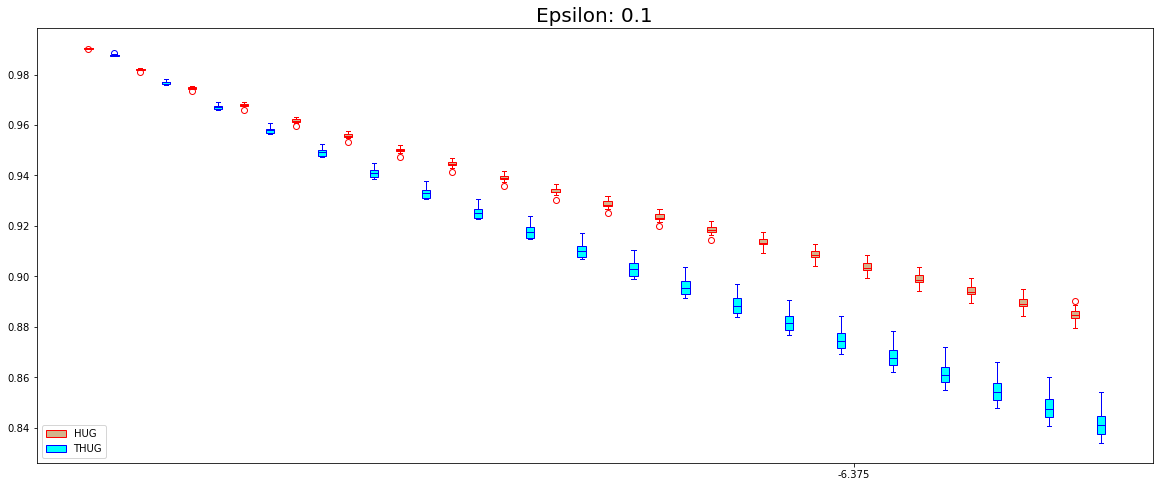

In [26]:
nlags = THETA_AC_HUG.shape[-1]
YLABELS = ["AUTOCORRELATION LAG {}".format(k) for k in range(1, nlags+1)]
columns = [EPSILONS[0]]
width = 0.25
thing_that_changes = range(nlags)
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = 3*nlags
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
fig, ax = plt.subplots(figsize=(20, 8))
widths = 0.08
handles = []
for lag in range(nlags):
    bp1 = box_plot(ax, THETA_AC_HUG[:,0 ,lag].T.tolist(), 'red', 'tan', positions[2*lag], widths=widths)
    bp2 = box_plot(ax, THETA_AC_THUG[:,0, 0, lag].T.tolist(), colors1[1], colors2[1], positions[2*lag+1], widths=widths)
handles.append(bp1['boxes'][0])
handles.append(bp2['boxes'][0])
labels = ['HUG'] + ['THUG']
ax.legend(handles, labels, loc='lower left')
ax.set_xticks(ticks)
ax.set_title("Epsilon: {}".format(EPSILONS[0]), fontsize=20)
plt.show()

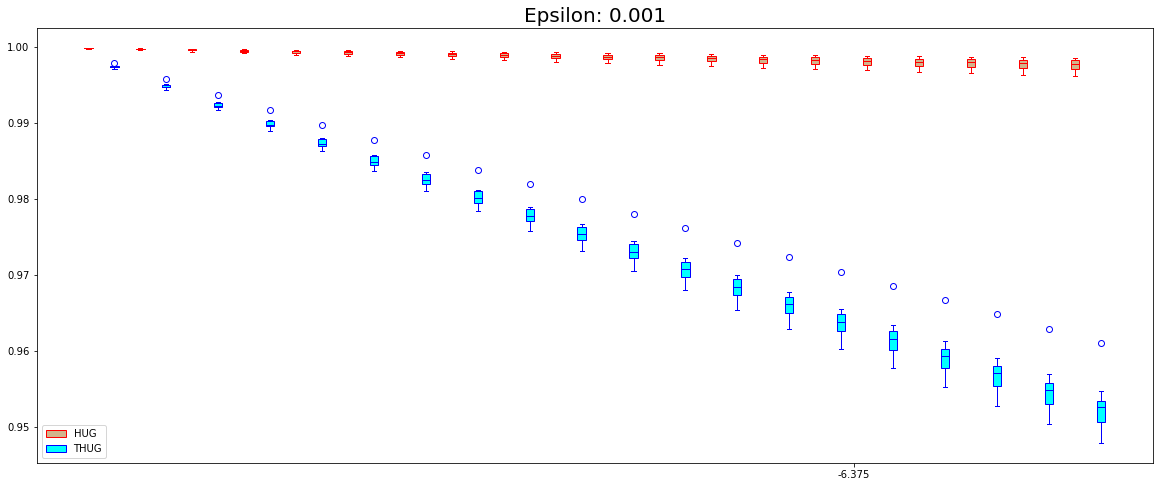

In [28]:
nlags = THETA_AC_HUG.shape[-1]
YLABELS = ["AUTOCORRELATION LAG {}".format(k) for k in range(1, nlags+1)]
columns = [EPSILONS[1]]
width = 0.25
thing_that_changes = range(nlags)
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = 3*nlags
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
fig, ax = plt.subplots(figsize=(20, 8))
widths = 0.08
handles = []
for lag in range(nlags):
    bp1 = box_plot(ax, THETA_AC_HUG[:,1 ,lag].T.tolist(), 'red', 'tan', positions[2*lag], widths=widths)
    bp2 = box_plot(ax, THETA_AC_THUG[:,1, 0, lag].T.tolist(), colors1[1], colors2[1], positions[2*lag+1], widths=widths)
handles.append(bp1['boxes'][0])
handles.append(bp2['boxes'][0])
labels = ['HUG'] + ['THUG']
ax.legend(handles, labels, loc='lower left')
ax.set_xticks(ticks)
ax.set_title("Epsilon: {}".format(EPSILONS[1]), fontsize=20)
plt.show()

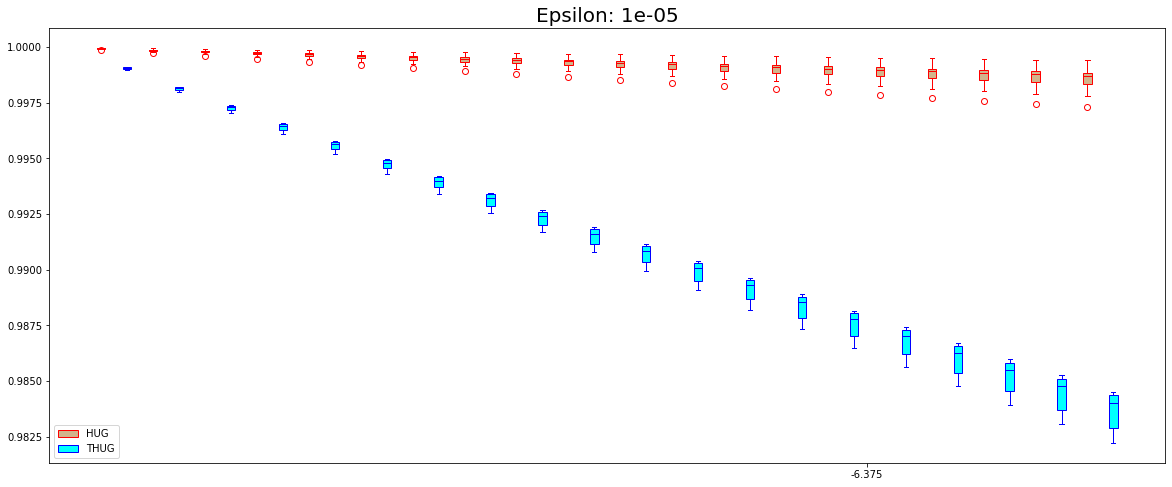

In [29]:
nlags = THETA_AC_HUG.shape[-1]
YLABELS = ["AUTOCORRELATION LAG {}".format(k) for k in range(1, nlags+1)]
columns = [EPSILONS[2]]
width = 0.25
thing_that_changes = range(nlags)
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = 3*nlags
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
fig, ax = plt.subplots(figsize=(20, 8))
widths = 0.08
handles = []
for lag in range(nlags):
    bp1 = box_plot(ax, THETA_AC_HUG[:,2 ,lag].T.tolist(), 'red', 'tan', positions[2*lag], widths=widths)
    bp2 = box_plot(ax, THETA_AC_THUG[:,2, 0, lag].T.tolist(), colors1[1], colors2[1], positions[2*lag+1], widths=widths)
handles.append(bp1['boxes'][0])
handles.append(bp2['boxes'][0])
labels = ['HUG'] + ['THUG']
ax.legend(handles, labels, loc='lower left')
ax.set_xticks(ticks)
ax.set_title("Epsilon: {}".format(EPSILONS[2]), fontsize=20)
plt.show()

In [30]:
THETA_ESS_HUG.mean(axis=0), THETA_ESS_THUG.mean(axis=0).flatten()

(array([504.24863218,  14.80185314,   6.41051768,   7.04121197]),
 array([725.84656598, 237.17259722,  69.90907087,  64.59770433]))

In [31]:
U_ESS_HUG.mean(axis=0), U_ESS_THUG.mean(axis=0).flatten()

(array([462.62747654,  12.34087109,   5.94741398,   9.24415204]),
 array([641.69847161, 192.24930863, 233.29300958,  40.27726728]))

In [35]:
A_HUG.mean(axis=0)

array([99.9999 , 99.98515, 98.42135, 34.80555])

In [36]:
A_THUG.mean(axis=0).T

array([[91.95085, 90.709  , 86.88695, 46.19255]])

# Autocorrelations

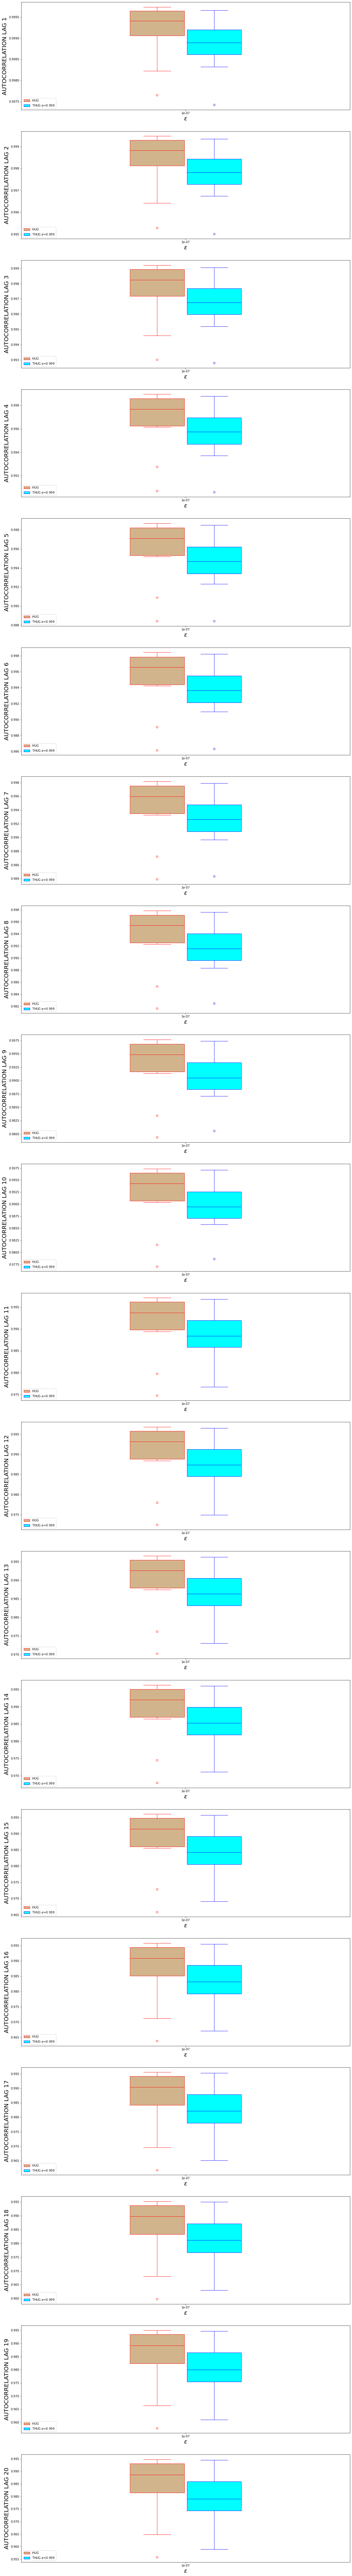

In [675]:
nlags = THETA_AC_HUG.shape[-1]
YLABELS = ["AUTOCORRELATION LAG {}".format(k) for k in range(1, nlags+1)]
columns = EPSILONS
width = 0.21
thing_that_changes = ALPHAS
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks

fig, ax = plt.subplots(nrows=nlags, figsize=(20, 8 * nlags))
for ix in range(nlags):
    bp1 = box_plot(ax[ix], THETA_AC_HUG[:,:,ix].T.tolist(), 'red', 'tan', positions[0])
    bps = []
    for i in range(n_alphas):
        bps.append(box_plot(ax[ix], THETA_AC_THUG[:,:,i, ix].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
    handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
    ax[ix].legend(
        handles, 
        labels, 
        loc='lower left')
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(columns)
    ax[ix].set_xlabel("$\\epsilon$", fontsize=20)
    ax[ix].set_ylabel(YLABELS[ix], fontsize=20)
    #ax[ix].semilogy()

# Testing visually

In [43]:
import numpy as np
from numpy import zeros, diag, eye, log, sqrt, vstack, mean, save
from numpy.linalg import solve
from scipy.stats import multivariate_normal as MVN
from tangential_hug_functions import HugTangentialStepEJSD_Deterministic, Hop_Deterministic, HugStepEJSD_Deterministic
from utils import ESS_univariate, ESS, n_unique
from numpy.random import normal, rand
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from utils import quick_MVN_scatter
from Manifolds.RotatedEllipse import RotatedEllipse

In [39]:
def log_uniform_kernel(xi, epsilon):
    """Log density of uniform kernel. """
    with np.errstate(divide='ignore'):
        return log((abs(target.logpdf(xi) - z0) <= epsilon).astype('float64'))
    
def logprior_uniform(xi):
    """Log density for uniform prior p(xi) of parameters and latents U([-5,5]x[-5,5])."""
    with np.errstate(divide='ignore'):
        return log((abs(xi) <= 5.0).all().astype('float64'))

def logprior_uniform_all(xi):
    """Log density for uniform prior p(xi) of parameters and latents U([-5,5]x[-5,5])."""
    with np.errstate(divide='ignore'):
        return log((abs(xi) <= 50.0).all(axis=1).astype('float64'))
    
def log_abc_posterior(xi):
    """Log density of ABC posterior. Product of (param-latent) prior and uniform kernel."""
    return logprior_uniform(xi) + log_uniform_kernel(xi, epsilon)

def log_abc_posterior_all(xi):
    """Log density of ABC posterior. Product of (param-latent) prior and uniform kernel."""
    return logprior_uniform_all(xi) + log_uniform_kernel(xi, epsilon)
    
def grad_log_simulator(xi):
    """Gradient of log simulator N(mu, Sigma)."""
    return - solve(Sigma, xi)

In [40]:
def experiment(x00, T1, T2, N, alphas, nlags):
    """Runs Hug+Hop and THUG+HOP using the same velocities and the same random seeds.
    We also try to limit the noise in the HOP kernel by sampling the u variables beforehand.
    I run THUG for all values of alpha with the randomness fixed. 
    This is 1 run, for 1 epsilon. It does 1 HUG+HOP and then THUG+HOP for all alphas."""
    ### COMMON VARIABLES
    v = q.rvs(N)
    log_uniforms1 = log(rand(N))     # Log uniforms for the HUG kernels
    log_uniforms2 = log(rand(N))     # Log uniforms for the HOP kernel
    u = MVN(zeros(2), eye(2)).rvs(N) # Original velocities for HOP kernel
    ### STORAGE (HUG + HOP)
    hh = x00              # Initial sample
    ahh1 = 0.0       # Acceptance probability for HUG kernel
    ahh2 = 0.0       # Acceptance probability for HOP kernel (when used with HUG)
    ehh = 0.0             # EJSD
    eghh = 0.0            # EJSD in Gradient direction
    ethh = 0.0            # EJSD in Tangent direction
    ### STORAGE (THUG + HOP) I MUST STORE FOR ALL ALPHAS
    ath1 = zeros(n_alphas)
    ath2 = zeros(n_alphas)
    eth  = zeros(n_alphas)
    egth = zeros(n_alphas)
    etth = zeros(n_alphas)
    ### ADDITIONAL STORAGE FOR THUG
    th_esst = zeros(n_alphas)
    th_essu = zeros(n_alphas)
    th_essj = zeros(n_alphas)
    th_rmse = zeros(n_alphas)
    th_uniq = zeros(n_alphas)
    th_act  = zeros((n_alphas, nlags))
    th_acu  = zeros((n_alphas, nlags))
    ### HUG + HOP
    x = x00
    for i in range(N):
        y, a1, e, eg, et = HugStepEJSD_Deterministic(x, v[i], log_uniforms1[i], T1, B, q, log_abc_posterior, grad_log_simulator)
        x, a2 = Hop_Deterministic(y, u[i], log_uniforms2[i], lam, kappa, log_abc_posterior, grad_log_simulator)
        hh = vstack((hh, y, x))
        ahh1 += a1 * 100 / N
        ahh2 += a2 * 100 / N
        ehh += e / N
        eghh += eg / N 
        ethh += et / N 
    # COMPUTE ESS AND OTHER METRICS FOR HUG
    hh = hh[1:]
    hh_esst = ESS_univariate(hh[::2, 0])     # ESS for theta
    hh_essu = ESS_univariate(hh[::2, 1])     # ESS for u
    hh_essj = ESS(hh[::2])                   # ESS joint
    hh_rmse = sqrt(mean((target.logpdf(hh) - z0)**2))  # RMSE on energy
    hh_uniq = n_unique(hh)                             # Number of unique samples
    hh_act  = acf(hh[::2, 0], adjusted=True, nlags=nlags, fft=True)[1:]  # Autocorrelation for theta (remove the first 1.0)
    hh_acu  = acf(hh[::2, 1], adjusted=True, nlags=nlags, fft=True)[1:]  # Autocorrelation for u
    ### THUG + HOP
    for k, alpha in enumerate(alphas):
        x = x00
        th = x00      # RESTART THE SAMPLES FROM SCRATCH
        for i in range(N):
            y, a1, e, eg, et = HugTangentialStepEJSD_Deterministic(x, v[i], log_uniforms1[i], T2, B, alpha, q, log_abc_posterior, grad_log_simulator)
            x, a2 = Hop_Deterministic(y, u[i], log_uniforms2[i], lam, kappa, log_abc_posterior, grad_log_simulator)
            th = vstack((th, y, x))
            ath1[k] += a1 * 100 / N
            ath2[k] += a2 * 100 / N
            eth[k]  += e / N
            egth[k] += eg / N 
            etth[k] += et / N 
        ### COMPUTE ESS AND OTHER METRISC FOR THUG
        th = th[1:]
        th_esst[k] = ESS_univariate(th[::2, 0])     # ESS for theta
        th_essu[k] = ESS_univariate(th[::2, 1])     # ESS for u
        th_essj[k] = ESS(th[::2])                   # ESS joint
        th_rmse[k] = sqrt(mean((target.logpdf(th) - z0)**2))  # RMSE on energy
        th_uniq[k] = n_unique(th)                             # Number of unique samples
        th_act[k] = acf(th[::2, 0], adjusted=True, nlags=nlags, fft=True)[1:]  # Autocorrelation for theta
        th_acu[k] = acf(th[::2, 1], adjusted=True, nlags=nlags, fft=True)[1:]  # Autocorrelation for u
    # RETURN EVERYTHING
    out = {
        'HH': {
            'A1': ahh1,
            'A2': ahh2,
            'E': ehh,
            'EG': eghh, 
            'ET': ethh,
            'ESS_T': hh_esst,
            'ESS_U': hh_essu,
            'ESS_J': hh_essj,
            'RMSE': hh_rmse,
            'UNIQUE': hh_uniq,
            'AC_T': hh_act,
            'AC_U': hh_acu,
            'SAMPLES': hh
        },
        'TH': {
            'A1': ath1,
            'A2': ath2,
            'E': eth,
            'EG': egth, 
            'ET': etth, 
            'ESS_T': th_esst,
            'ESS_U': th_essu,
            'ESS_J': th_essj,
            'RMSE': th_rmse,
            'UNIQUE': th_uniq,
            'AC_T': th_act,
            'AC_U': th_acu,
            'SAMPLES': th
        }
    }
    return out

In [808]:
# Target distribution is a diagonal MVN
Sigma = diag([1.0, 5.0])
target = MVN(zeros(2), Sigma)

# Proposal for velocity in HUG/THUG
q = MVN(zeros(2), eye(2))

# Full coverage happened for T=0.2, N=200000
# Settings
T1 = 10.0
T2 = 10.0
B = 5
N = 100000
kappa = 0.25
nlags = 20

epsilons = [0.01] #[0.0000001]
alphas = [0.99]
n_epsilons = len(epsilons)
n_alphas = len(alphas)
epsilon = epsilons[0]
lam = epsilon

In [809]:
#### HUG #####
# SETTINGS FOR EPSILON=0.1
# T=8, THETA ESS=25k
# T=6, THETA ESS=36k
# T=4, THETA ESS=57k
# T=3, THETA ESS=64k #####
# T=2, THETA ESS=53k

# SETTINGS FOR EPSILON=0.01
# T=7, THETA ESS=6k
# T=5, THETA ESS=10k
# T=4, THETA ESS=14k
# T=3, THETA ESS=18k
# T=2, THETA ESS=21k #####
# T=1, THETA ESS=14k

# SETTINGS FOR EPSILON=0.001


#### THUG ####
### SETTINGS FOR EPSILON=0.1

### SETTINGS FOR EPSILON=0.01
## ALPHA = 0.3
# T=7, THETA ESS=8k
# T=5, THETA ESS=12k
# T=4, THETA ESS=15k
# T=3, THETA ESS=19k
# T=2, THETA ESS=20k  ####
# T=1, THETA ESS=12k
## ALPHA = 0.5
# T=7, THETA ESS=9k
# T=5, THETA ESS=13k
# T=4, THETA ESS=15k
# T=3, THETA ESS=18k   
# T=2, THETA ESS=17k
# T=1, THETA ESS=10k
## ALPHA = 0.7
# T=7, THETA ESS=10k
# T=5, THETA ESS=13k
# T=4, THETA ESS=14k
# T=3, THETA ESS=14k
# T=2, THETA ESS=13k
# T=1, THETA ESS=9k
## ALPHA = 0.8
# T=7, THETA ESS=10k
# T=5, THETA ESS=10k
# T=3, THETA ESS=12k  
# T=2, THETA ESS=11k
# T=1, THETA ESS=7k
## ALPHA = 0.9
# T=7, THETA ESS=7k
# T=5, THETA ESS=7k
# T=3, THETA ESS=8k
# T=2, THETA ESS=8k
# T=1, THETA ESS=7k
## ALPHA = 0.99
# T=10, THETA ESS=
# T=7, THETA ESS=2k
# T=5, THETA ESS=2k
# T=3, THETA ESS=3k
# T=2, THETA ESS=2k
# T=1, THETA ESS=2k

In [810]:
z0 = -2.9513586307684885

In [811]:
x0 = RotatedEllipse(zeros(2), Sigma, np.exp(z0)).to_cartesian(np.random.uniform(0, 2*np.pi))

In [ ]:
out = experiment(x0, T1, T2, N, alphas, nlags)

In [ ]:
quick_MVN_scatter(out['HH']['SAMPLES'][::2], target, levels=[np.exp(z0)], lw=1, alpha=0.5, xlims=[-1, 1], ylims=[-2,2], aspect=True)

In [ ]:
quick_MVN_scatter(out['TH']['SAMPLES'][::2], target, levels=[np.exp(z0)], lw=1, alpha=0.5, xlims=[-1, 1], ylims=[-2,2], aspect=True)

In [ ]:
plt.plot(out['HH']["AC_T"], label='hug')
plt.plot(out['TH']["AC_T"].flatten(), label='thug')
plt.legend()
plt.show()

In [ ]:
out['HH']['A1'], *out['TH']['A1']

In [ ]:
# ESS on U
ESS_univariate(out['HH']['SAMPLES'][::2, 1]), ESS_univariate(out['TH']['SAMPLES'][::2, 1])

In [ ]:
# ESS on thetA
ESS_univariate(out['HH']['SAMPLES'][::2, 0]), ESS_univariate(out['TH']['SAMPLES'][::2, 0])

In [ ]:
ESS(out['HH']['SAMPLES'][::2]), ESS(out['TH']['SAMPLES'][::2])

In [ ]:
!say FINISHED

In [832]:
def sample_autocorrelation(samples, k=1):
    mean_val   = mean(samples, axis=0)
    sample_cov = np.sum((samples[:-k] - mean_val) * (samples[k:] - mean_val), axis=0) / (N - k)
    sample_var = mean((samples - mean_val)**2, axis=0)
    return sample_cov / sample_var, sample_cov, sample_var

In [836]:
hh_auto, hh_cov, hh_var = sample_autocorrelation(out['HH']['SAMPLES'][::2])

In [837]:
th_auto, th_cov, th_var = sample_autocorrelation(out['TH']['SAMPLES'][::2])

In [839]:
hh_auto > th_auto

array([ True,  True])

In [843]:
hh_cov, th_cov

(array([0.33825282, 0.29501418]), array([0.26727116, 1.21316245]))

In [844]:
hh_var, th_var

(array([0.3382565 , 0.29505013]), array([0.26728225, 1.21351619]))

In [903]:
ESS_univariate(out['HH']['SAMPLES'][::2, 0])

7.4873348585415425

In [904]:
ESS_univariate(out['TH']['SAMPLES'][::2, 0])

6.180503554164502

In [905]:
out['HH']['ESS_T']

7.4873348585415425

In [906]:
out['TH']['ESS_T']

array([6.18050355])

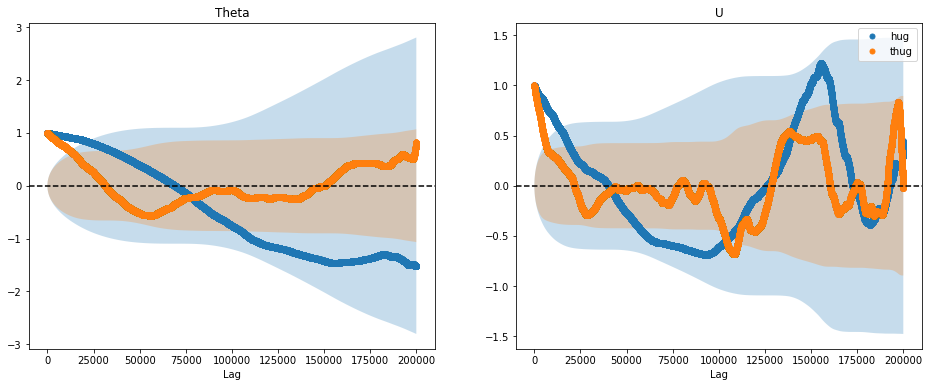

In [775]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
n_lags = 199999
_ = plot_acf(out['HH']['SAMPLES'][::2, 0], ax=ax[0], lags=n_lags, adjusted=True, fft=True, use_vlines=False, label='hug')
_ = plot_acf(out['TH']['SAMPLES'][::2, 0], ax=ax[0], lags=n_lags, adjusted=True, fft=True, use_vlines=False, label='thug')
_ = plot_acf(out['HH']['SAMPLES'][::2, 1], ax=ax[1], lags=n_lags, adjusted=True, fft=True, use_vlines=False, label='hug')
_ = plot_acf(out['TH']['SAMPLES'][::2, 1], ax=ax[1], lags=n_lags, adjusted=True, fft=True, use_vlines=False, label='thug')
ax[0].set_title("Theta")
ax[0].set_xlabel("Lag")
ax[0].axhline(0.0, linestyle='--', color='black')
ax[1].set_title("U")
ax[1].set_xlabel("Lag")
ax[1].axhline(0.0, linestyle='--', color='black')
plt.legend()
plt.show()

In [740]:
out['HH']['A1'], *out['TH']['A1']

(0.7379999999999741, 15.715500000007715)

In [733]:
# THETA ESS FOR HUG/THUG ONLY
ESS_univariate(out['HH']['SAMPLES'][::2, 0]), ESS_univariate(out['TH']['SAMPLES'][::2, 0])

(2.738240335306643, 6.377495292664875)

In [734]:
# THETA ESS FOR HUG+HOP OR THUG+HOOP
ESS_univariate(out['HH']['SAMPLES'][:, 0]), ESS_univariate(out['TH']['SAMPLES'][:, 0])

(2.7382402650109636, 6.377495627760788)

In [735]:
# U ESS FOR HUG/THUG ONLY
ESS_univariate(out['HH']['SAMPLES'][::2, 1]), ESS_univariate(out['TH']['SAMPLES'][::2, 1])

(6.335511558753299, 13.590352643758807)

In [736]:
ESS(out['HH']['SAMPLES']), ESS(out['TH']['SAMPLES'])

(635.172020957765, 638.6248118279967)

In [737]:
ESS(out['HH']['SAMPLES'][::2]), ESS(out['TH']['SAMPLES'][::2])

(449.283087844038, 452.9565761056708)

In [145]:
# NEED TO PLOT THE GRADIENTS AT VARIOUS POINTS ON THE MANIFOLD.
from Manifolds.RotatedEllipse import RotatedEllipse
from numpy.linalg import norm
manifold = RotatedEllipse(zeros(2), Sigma, np.exp(z0))
points = np.array([manifold.to_cartesian(t) for t in np.linspace(0, 2*np.pi, 51)])

In [146]:
grads = vstack([grad_log_simulator(points[i]) for i in range(len(points))])
norm_grads = vstack([xx / norm(xx) for xx in grads])

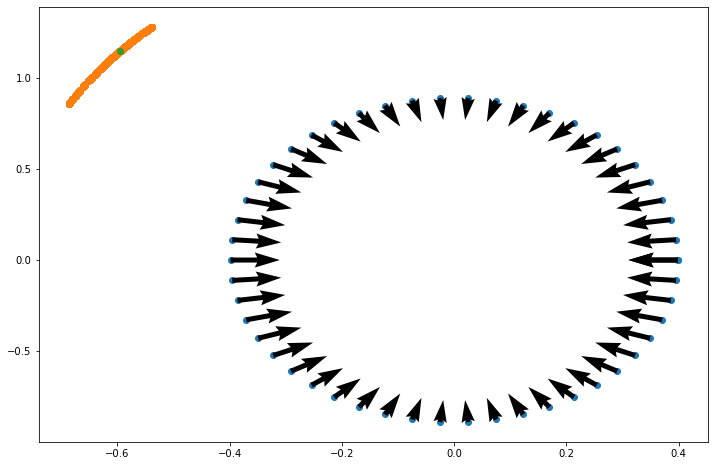

array([12.,  8.])

In [662]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(*points.T)
ax.quiver(*points.T, *grads.T)
ax.scatter(*out['TH']['SAMPLES'].T)
ax.scatter(*x0)
plt.show()
fig.get_size_inches()

In [107]:
# POINT WHERE IT STOPS
out['TH']['SAMPLES'][np.argmax(out['TH']['SAMPLES'][:, 1]), :]

array([-0.23825083,  0.71367972])

In [98]:
out['HH']['A1'], out['HH']['A2'], out['TH']['A1'], out['TH']['A2']

(0.1360000000000001, 74.52199999999178, array([9.928]), array([83.519]))

In [90]:
out['HH']['ESS_T'], out['TH']['ESS_T']

(4.282319186059182, array([60.3101065]))

In [91]:
out['HH']['ESS_U'], out['TH']['ESS_U']

(20.514006876070408, array([60.57906214]))

In [92]:
ESS(out['HH']['SAMPLES'][::2]), ESS(out['HH']['SAMPLES'])

(231.03693779175015, 322.06087273792696)

In [93]:
ESS(out['TH']['SAMPLES'][::2]), ESS(out['TH']['SAMPLES'])

(265.32492572842887, 363.40569619141286)